<a href="https://colab.research.google.com/github/Cnappi1/Comp3800_Fall2024/blob/main/Project3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link To Project in GitHub: Link To Video: Link To Data:https://www.kaggle.com/datasets/ananthr1/weather-prediction

The attached dataset is for weather in Seattle during a period of time. I will use this dataset to build an ARIMA model that will predict future wind data based on the historical wind data.

In [1]:
import pandas as pd

Link To Project Video: https://www.loom.com/share/b3841cd01bd849c19ec7d3aaaaca7e9e?sid=e0bdcecc-3817-4051-b35b-9396c98de47b

#Importing data
data = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

In [ ]:
# Display the first few rows of the dataset
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [ ]:
# Check for missing values
print(data.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Set the 'date' column as the DataFrame index
data.set_index('date', inplace=True)

In [ ]:
# Looking at data details
print(df.head())
print(df.info())
print(df.describe())

            precipitation  temp_max  temp_min  wind  weather  month  day  \
date                                                                       
2012-01-01            0.0      12.8       5.0   4.7  drizzle      1    1   
2012-01-02           10.9      10.6       2.8   4.5     rain      1    2   
2012-01-03            0.8      11.7       7.2   2.3     rain      1    3   
2012-01-04           20.3      12.2       5.6   4.7     rain      1    4   
2012-01-05            1.3       8.9       2.8   6.1     rain      1    5   

            year  temp_max_lag1  temp_min_lag1  precip_lag1  \
date                                                          
2012-01-01  2012            NaN            NaN          NaN   
2012-01-02  2012           12.8            5.0          0.0   
2012-01-03  2012           10.6            2.8         10.9   
2012-01-04  2012           11.7            7.2          0.8   
2012-01-05  2012           12.2            5.6         20.3   

            temp_max_roll

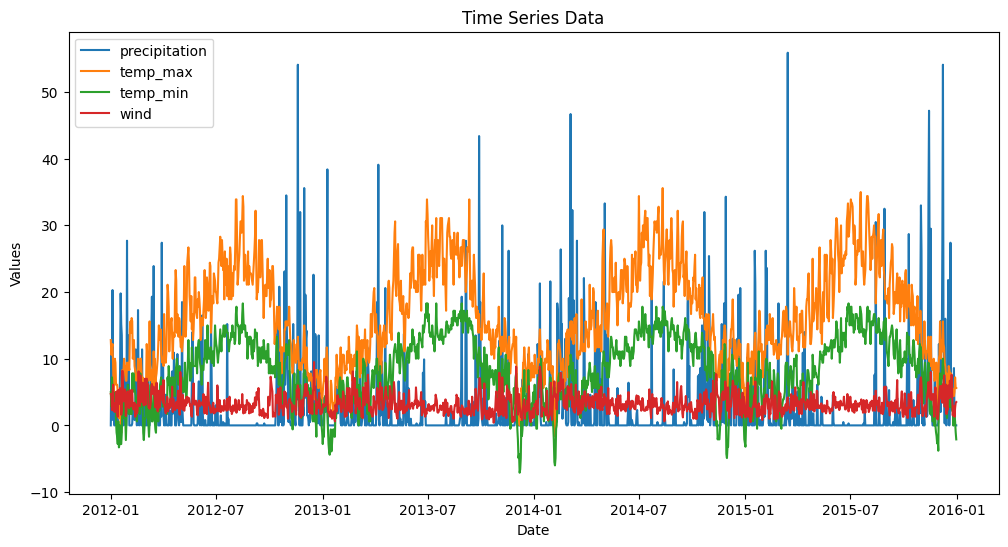

In [ ]:
import matplotlib.pyplot as plt

# Selecting the numerical columns to visualize data
numeric_data = data[['precipitation', 'temp_max', 'temp_min', 'wind']]

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(numeric_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(numeric_data.columns)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(data['wind'])
adf_statistic = result[0]
p_value = result[1]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

# Interpret the result
if p_value < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be required.")

ADF Statistic: -24.50737190120076
p-value: 0.0
The time series is stationary.


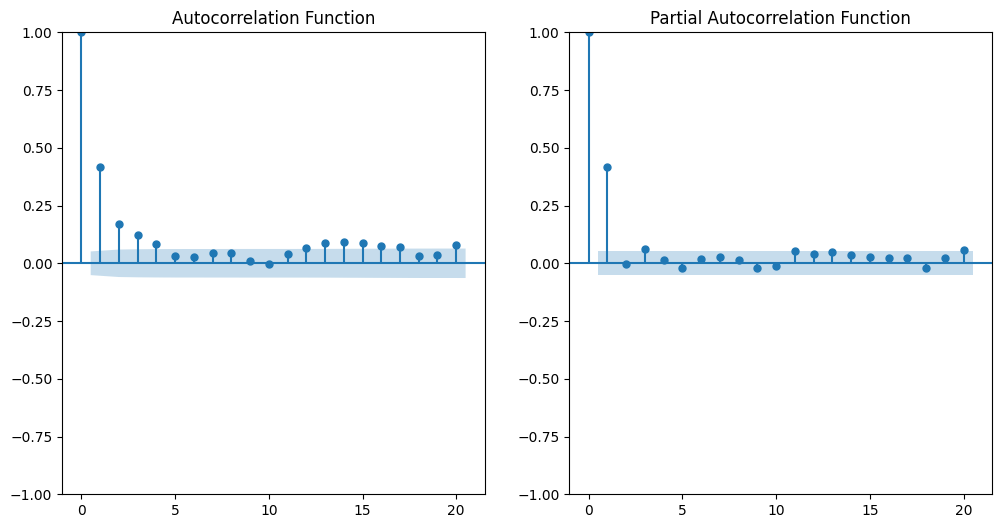

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(data['wind'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(1, 2, 2)
plot_pacf(data['wind'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.show()

In [ ]:
import pmdarima as pm

# Fit the Auto ARIMA model
model = pm.auto_arima(data['wind'], seasonal=False, stepwise=True)

# Print the summary of the model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1461
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2460.745
Date:                Tue, 10 Dec 2024   AIC                           4931.491
Time:                        23:24:17   BIC                           4957.925
Sample:                    01-01-2012   HQIC                          4941.352
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7777      0.111     16.078      0.000       1.561       1.994
ar.L1          0.4186      0.025     16.955      0.000       0.370       0.467
ar.L2         -0.0301      0.027     -1.122      0.2

What the ARIMA model is doing:
Checks if the data is stationary and applies differencing if needed to make a data stationary
Identifies if there is a seasonal component to the data
Uses a grid search to find the best values for ARIMA parameters (p, d, and q) based on information criteria
Fits the final model used to generate forecasts.


In [ ]:
# Forecast the next n periods (e.g., 10 periods)
n_periods = 10
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecasted values
print("Forecasted values:", forecast)
print("Confidence intervals:", conf_int)

Forecasted values: 2016-01-01    3.304730
2016-01-02    3.270523
2016-01-03    3.268402
2016-01-04    3.256207
2016-01-05    3.249005
2016-01-06    3.246223
2016-01-07    3.244505
2016-01-08    3.243415
2016-01-09    3.242834
2016-01-10    3.242516
Freq: D, dtype: float64
Confidence intervals: [[0.74937323 5.86008687]
 [0.50031446 6.04073108]
 [0.47348538 6.06331848]
 [0.44685188 6.06556215]
 [0.43417385 6.06383584]
 [0.43000691 6.06243959]
 [0.42785113 6.06115942]
 [0.4266092  6.06022051]
 [0.42598149 6.0596873 ]
 [0.42564815 6.05938327]]


In [ ]:
# Create a time index for the forecast
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')

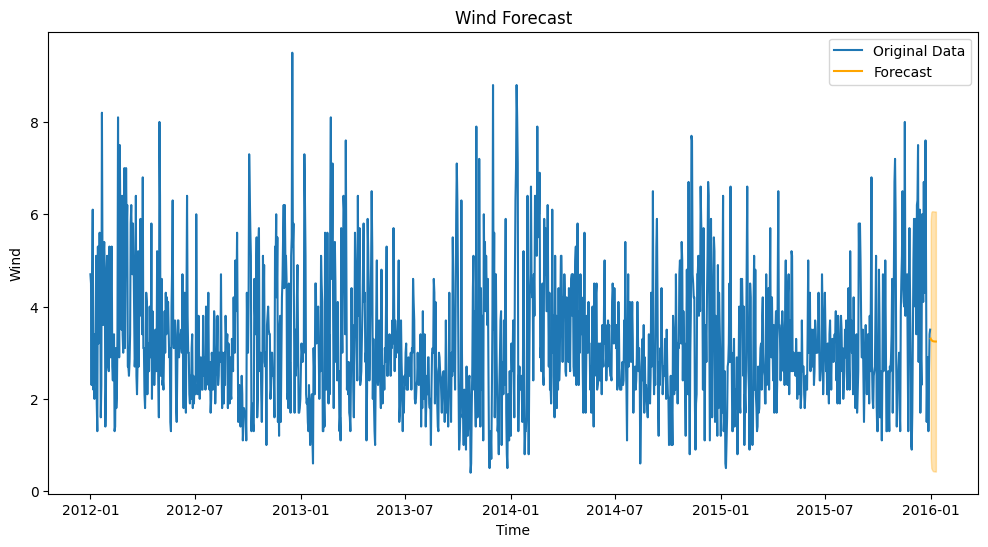

In [ ]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['wind'], label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.3)
plt.title('Wind Forecast')
plt.xlabel('Time')
plt.ylabel('Wind')
plt.legend()
plt.show()

In [ ]:
#Calculating the MAE
from sklearn.metrics import mean_absolute_error


actual_values = data['wind'].tail(10).values

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, forecast)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.2910350376198112


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.753103885684778


In [ ]:
# Calculate MAPE
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 46.01455171192799


Now we are going to build a linear regression model for comparison

Next few sections of code are going to be reloading the data and prepping it for these other models.

In [ ]:
# Load your data
data = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

In [ ]:
#Check for null values
data.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Handle categorical variables (one-hot encoding for 'weather')
data = pd.get_dummies(data, columns=['weather'], drop_first=True)

In [ ]:
# Select features and target variable
X = data[['precipitation', 'temp_max', 'temp_min'] + [col for col in data.columns if 'weather_' in col]]
y = data['wind']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit Linear Regression model
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn.linear_model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Create a DataFrame to compare actual and predicted values
lr_forecast_df = pd.DataFrame({
    'Actual Wind': y_test.values,  # Replace y_test with your actual target values
    'Linear Regression Prediction': lr_predictions
})

# Print the first few rows of the Linear Regression forecasted data
print("Linear Regression Forecast:")
print(lr_forecast_df.head())

Linear Regression Forecast:
   Actual Wind  Linear Regression Prediction
0          2.7                      2.900022
1          0.5                      3.715749
2          3.4                      3.375679
3          2.5                      2.858496
4          2.9                      3.422536


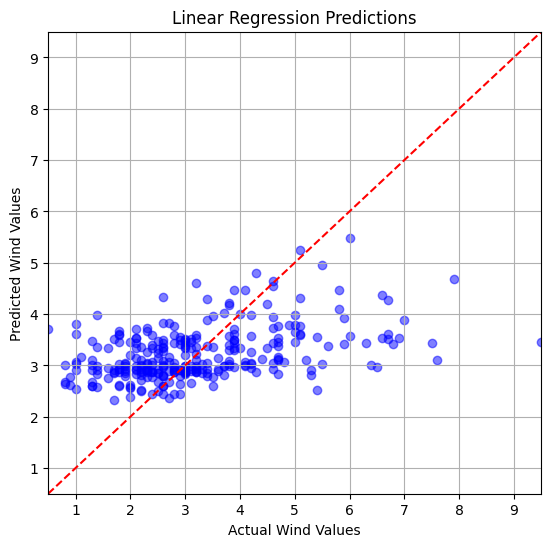

In [ ]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of equality
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Wind Values')
plt.ylabel('Predicted Wind Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()

In [ ]:
# Evaluate performance
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import root_mean_squared_error
import numpy as np

# Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_mape = np.mean(np.abs((y_test - lr_predictions) / y_test)) * 100  # MAPE

print("Linear Regression - RMSE:", lr_rmse)
print("Linear Regression - MAPE:", lr_mape)

Linear Regression - RMSE: 1.327884787600762
Linear Regression - MAPE: 41.81837411249153


Now creating the KNN model to get RMSE and MAPE values to compare to my orginal ARIMA model and the new Linear Regression Model

In [ ]:
# Fit KNN model
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Make predictions
knn_predictions = knn_model.predict(X_test)

In [ ]:
# Create a DataFrame to compare actual and predicted values
knn_forecast_df = pd.DataFrame({
    'Actual Wind': y_test.values,  # Replace y_test with your actual target values
    'KNN Prediction': knn_predictions
})

# Print the first few rows of the KNN forecasted data
print("KNN Forecast:")
print(knn_forecast_df.head())

KNN Forecast:
   Actual Wind  KNN Prediction
0          2.7            2.52
1          0.5            5.02
2          3.4            2.62
3          2.5            3.58
4          2.9            4.34


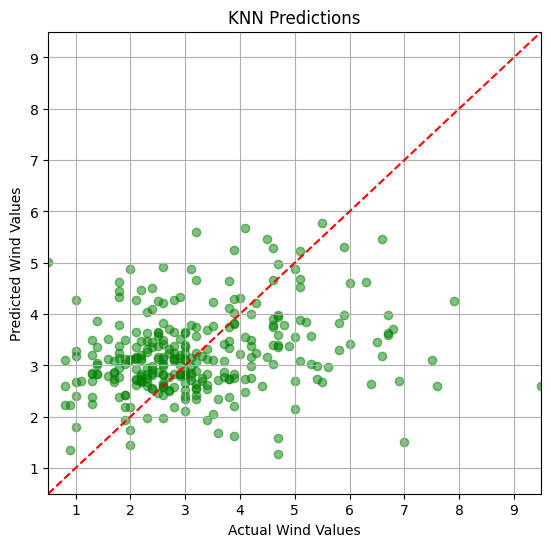

In [ ]:
# Plot for KNN
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, knn_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of equality
plt.title('KNN Predictions')
plt.xlabel('Actual Wind Values')
plt.ylabel('Predicted Wind Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()


In [ ]:
# Evaluate performance
from sklearn.metrics import mean_squared_error # Import mean_squared_error

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mape = np.mean(np.abs((y_test - knn_predictions) / y_test)) * 100

print("KNN RMSE:", knn_rmse)
print("KNN MAPE:", knn_mape)

KNN RMSE: 1.4986346459520352
KNN MAPE: 45.24751061922005


Performance Metrics
KNN:
RMSE: 1.4986
MAPE: 45.25%
Linear Regression:
RMSE: 1.3279
MAPE: 41.82%
ARIMA:
RMSE: 1.7531
MAPE: 46.01%

Based on these values the linear regression model is the best model. I will be using it for my RESTFUL API.

Why I compared RMSE and MAPE for these 3 models instead of R2:
MAPE and RMSE provide a better picture of predictive performance than R2. This is important because the purpose of the ARIMA model is making predictions and forecasts.

In [238]:
#Saving my linear regression model with pickle
import pickle

with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

In [236]:
import pandas as pd
import pickle

# Input values for prediction
precipitation = 0.0
temp_max = 25.0
temp_min = 14.4
weather_drizzle = 0
weather_fog = 0
weather_rain = 0
weather_snow = 0
weather_sun = 1
feature_names = ['precipitation', 'temp_max', 'temp_min', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']

# Load the saved Linear Regression model
lr_model = pickle.load(open('linear_regression_model.pkl', "rb"))

# Create a DataFrame for prediction input
input_data = pd.DataFrame([[precipitation, temp_max, temp_min, weather_fog, weather_rain, weather_snow, weather_sun]],
                         columns=feature_names)

# Make a prediction
lr_result = lr_model.predict(input_data)

# Print the prediction result
print("Linear Regression Prediction:", lr_result[0])

#Actual value for this test data was 2.9 in dataset

Linear Regression Prediction: 2.9180174649469857


Websites Used To Better Understand Topics and Code:
https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting,
https://www.statology.org/dickey-fuller-test-python/,
https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html,
https://alkaline-ml.com/pmdarima/tips_and_tricks.html,
https://stackoverflow.com/questions/69097846/,predict-using-fit-pmdarima-arima-model

